# 남양주TG :: `양양방향`의 OD별 Local X (m)에 따른 속도 그래프
* 선 그래프로 모든 차량의 속도분포 나타내기
* 각 시작점 차로, 각 부스별로 나타내기

# Set Up

## Import

In [46]:
import numpy as np
import pandas as pd
import math
import os

from tqdm import tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Dataset

In [47]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/양양방향/01_density_by_target_LOS_concated_lanechange'

In [48]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/35_22-9차 회의 준비/15_OD별 x별 속도가속도분포 산점도/양양방향'

In [49]:
file_list = os.listdir(data_dir)
file_list = file_list[3:]
print(file_list)

['04_1_A.csv', '04_2_A.csv']


## Define Function
* 참고 : 2개의 컬럼에 apply 함수 적용 : https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

In [50]:
def merge_str(origin, destination):
    """두 컬럼의 텍스트 값을 결합하여 OD를 만들어준다
    결과 : rigin_destination"""
    
    return origin + '_' + destination

## Color Palette
* 10색 무지개 컬러코드 : https://yagisanatode.com/2019/08/06/google-apps-script-hexadecimal-color-codes-for-google-docs-sheets-and-slides-standart-palette/

In [120]:
palette = {'U1': '#980000', 'U2': '#ff0000', 'U3': '#ff9900', 'U4': '#ffff00', 
           'U5': '#00ff00', 'U6': '#00ffff', 'U7': '#4a86e8', 'U8': '#0000ff',
           'U9': '#9900ff', 'U10': '#ff00ff'}
# 레드베리, 빨주노초, 싸이안, 콘플라워블루, 블루, 퍼플, 마젠타 --- 총 10색

## OD, Lane Identification
* `04_1.csv` :
    * U1 ~ U4 : 그대로
* `04_2.csv` :
    * 시작 : U3
    * 끝 : U5~8

# RUN

## 속도

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

04_1_A.csv ['U1_U1' 'U4_U4' 'U2_U2' 'U2_U1' 'U2_U4' 'U1_U2' 'U3_U4' 'U3_U3' 'U3_U2'
 'U2_U3' 'U1_U3' 'U3_U1']


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

04_2_A.csv ['U3_U8' 'U3_U6' 'U3_U5' 'U3_U7']


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.36it/s]


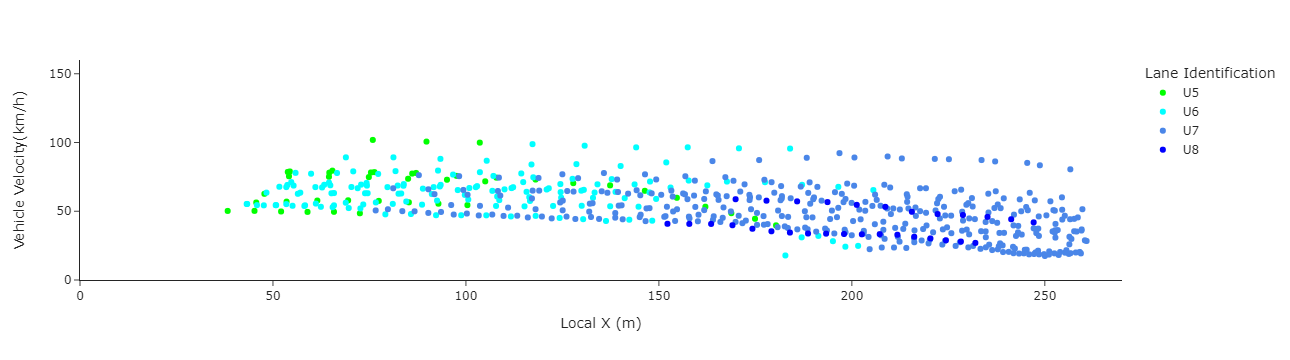

In [169]:
folder_name = '속도'

for file in file_list:
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df = df[(df['Lane_00'] != 'UNKNOWN') & (df['Lane_99'] != 'UNKNOWN')]
    
    # 파일번호 : 1, 2
    if file[3] == '2': # 파일번호 1이면 그냥 Lane Identification 건드리지 않음
        # 특정 열 내에서만 값 대체를 하고싶다면 df. replace(['math','english'],['mh','eng'])형태로
        df['Lane Identification'].replace({'U1': 'U5', 'U2': 'U6', 'U3': 'U7', 'U4': 'U8'}, inplace = True)
        df['Lane_00'].replace({'U1': 'U3', 'U2': 'U3', 'U3': 'U3', 'U4': 'U3'}, inplace = True)
        df['Lane_99'].replace({'U1': 'U5', 'U2': 'U6', 'U3': 'U7', 'U4': 'U8'}, inplace = True)

    else:
        pass
            
    df['OD'] = df.apply(lambda x: merge_str(x.Lane_00, x.Lane_99), axis = 1) # 함수를 적용하여 OD컬럼 생성
    OD_list = df['OD'].unique()
    
    #print(file, OD_list)
    
    for OD in tqdm(OD_list): # OD 리스트별로 필터링한다
        df_p = df[df['OD'] == OD] # 이 필터링된 그래프별로 속도 선그래프를 그려준다
        
        ## 산점도 그래프 그리기
        fig = px.scatter(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)',
                         color = 'Lane Identification',
                         color_discrete_map = palette,
                         template = 'simple_white')
#        fig = px.line(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)', line_group = 'Vehicle ID')
        
        ## 축설정 : x축 0~270, y축 0~160
        fig.update_xaxes(range = [0, 270])
        fig.update_yaxes(range = [0, 160])

#         save_html_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.html'
#         save_html_path = os.path.join(save_dir, save_html_name)
    
#         fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
#         #글자 없는 것을 PNG 투명이미지로 저장
#         fig.update_layout({
#                 'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
#                 'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
#             })
        
        save_png_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.png'
        save_folder_dir = os.path.join(save_dir, folder_name)
        save_png_path = os.path.join(save_folder_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
fig.show()

In [149]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Vehicle ID,Frame ID,Total Frames,Global Time (Epoch Time),Local X (m),...,Time Headway,Bad Object,Special Car,Lane Class,Vehicle Movement,Lane_record,Lane_00,Lane_99,Lane_change,OD
0,0,0,0,0,0,9,405,71,46813500,56.369911,...,0.0,0,0,���ົ��,8.962026,U2_U3_U4,U2,U4,NaN,U2_U4
1,1,1,1,1,1,9,420,86,46814000,66.157082,...,0.0,0,0,���ົ��,9.870358,U2_U3_U4,U2,U4,NaN,U2_U4
3,3,3,3,3,3,9,435,101,46814500,75.863586,...,0.0,0,0,���ົ��,9.785293,U2_U3_U4,U2,U4,NaN,U2_U4
5,5,5,5,5,5,9,450,116,46815000,85.452293,...,0.0,0,0,���ົ��,9.670253,U2_U3_U4,U2,U4,NaN,U2_U4
9,7,7,7,7,7,9,465,131,46815500,94.874168,...,0.0,0,0,���ົ��,9.499165,U2_U3_U4,U2,U4,NaN,U2_U4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9366,9362,1667,9362,9506,1690,40438,405205,391,46973500,232.558121,...,0.0,0,0,���ົ��,7.466659,U2,U2,U2,NaN,U2_U2
9368,9368,1673,9368,9512,1696,40438,405220,406,46974000,239.523239,...,0.0,0,0,���ົ��,6.965704,U2,U2,U2,NaN,U2_U2
9379,9374,1679,9374,9518,1702,40438,405235,421,46974500,245.982529,...,0.0,0,0,���ົ��,6.459474,U2,U2,U2,NaN,U2_U2
9381,9381,1686,9381,9525,1709,40438,405250,436,46975000,251.945847,...,0.0,0,0,���ົ��,5.963454,U2,U2,U2,NaN,U2_U2


## 가속도

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.59it/s]


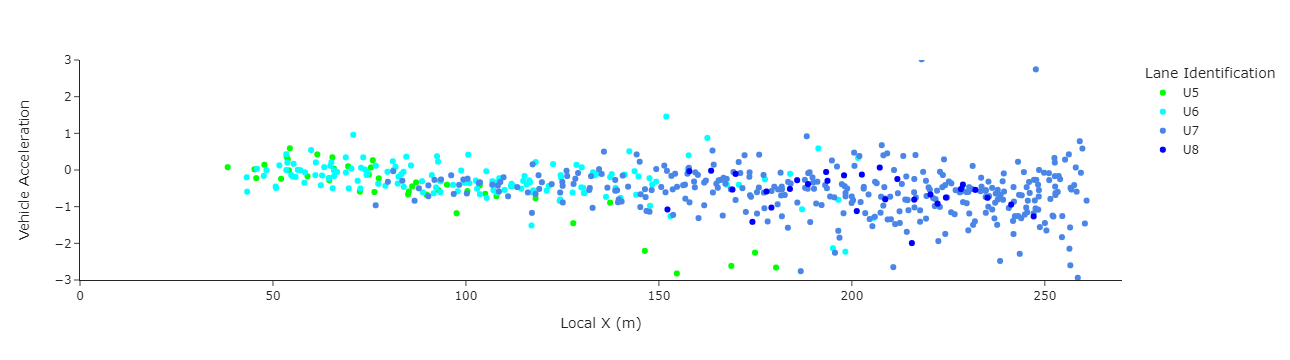

In [171]:
folder_name = '가속도'

for file in file_list:
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df = df[(df['Lane_00'] != 'UNKNOWN') & (df['Lane_99'] != 'UNKNOWN')]
    
    # 파일번호 : 1, 2
    if file[3] == '2': # 파일번호 1이면 그냥 Lane Identification 건드리지 않음
        # 특정 열 내에서만 값 대체를 하고싶다면 df. replace(['math','english'],['mh','eng'])형태로
        df['Lane Identification'].replace({'U1': 'U5', 'U2': 'U6', 'U3': 'U7', 'U4': 'U8'}, inplace = True)
        df['Lane_00'].replace({'U1': 'U3', 'U2': 'U3', 'U3': 'U3', 'U4': 'U3'}, inplace = True)
        df['Lane_99'].replace({'U1': 'U5', 'U2': 'U6', 'U3': 'U7', 'U4': 'U8'}, inplace = True)

    else:
        pass
            
    df['OD'] = df.apply(lambda x: merge_str(x.Lane_00, x.Lane_99), axis = 1) # 함수를 적용하여 OD컬럼 생성
    OD_list = df['OD'].unique()
    
    #print(file, OD_list)
    
    for OD in tqdm(OD_list): # OD 리스트별로 필터링한다
        df_p = df[df['OD'] == OD] # 이 필터링된 그래프별로 속도 선그래프를 그려준다
        
        ## 차로별 팔레트 설정
        lane_list = np.sort(df['Lane Identification'].unique())
        
        sub_palette = []
        for lane in lane_list:
            sub_palette.append(palette[lane])
        
        ## 산점도 그래프 그리기
        fig = px.scatter(df_p, x = 'Local X (m)', y = 'Vehicle Acceleration',
                         color = 'Lane Identification',
                         color_discrete_sequence = sub_palette,
                         category_orders = {'Lane Identification' : ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10', 
                                            'U11', 'U12', 'U13', 'U14', 'U15', 'U16']},
                         template = 'simple_white')
#        fig = px.line(df_p, x = 'Local X (m)', y = 'Vehicle Velocity(km/h)', line_group = 'Vehicle ID')
        
        ## 축설정 : x축 0~270, y축 0~160
        fig.update_xaxes(range = [0, 270])
        fig.update_yaxes(range = [-3, 3])

#         save_html_name = f'Velocity_by_OD_{file[-10:-6]}_{OD}.html'
#         save_html_path = os.path.join(save_dir, save_html_name)
    
#         fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
#         #글자 없는 것을 PNG 투명이미지로 저장
#         fig.update_layout({
#                 'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
#                 'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
#             })
        
        save_png_name = f'acc_by_OD_{file[-10:-6]}_{OD}.png'
        save_folder_dir = os.path.join(save_dir, folder_name)
        save_png_path = os.path.join(save_folder_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
fig.show()